공공데이터포털에서 <br>
소상공인시장진흥공단_상가(상권)정보_ api<br>
사용할 준비하기 14:53:00 <br>
일반 인증키
(Encoding)	
AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT%2Bx7OrA%3D%3D
일반 인증키
(Decoding)	
AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT+x7OrA==

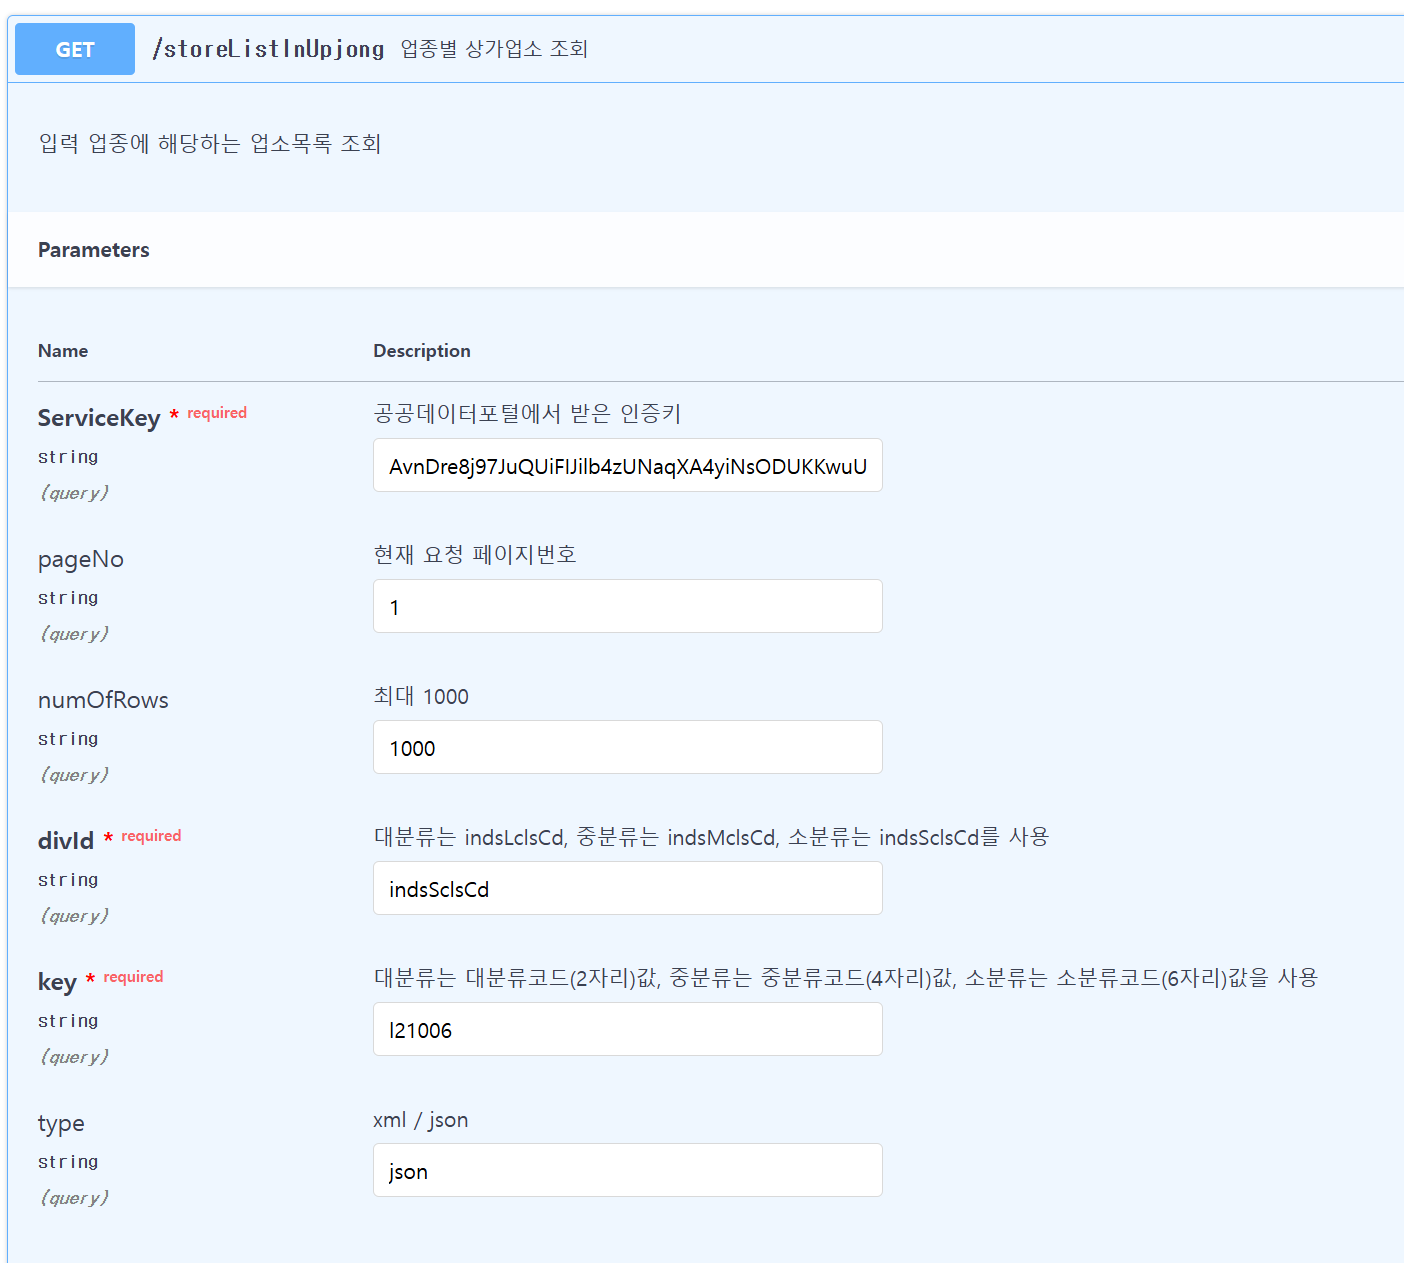
[공공데이터 : 상권정보]https://www.data.go.kr/data/15012005/openapi.do#/

레퍼런스는 따로 파일로주며 여러 파일의 것과 섞여있으니 주의
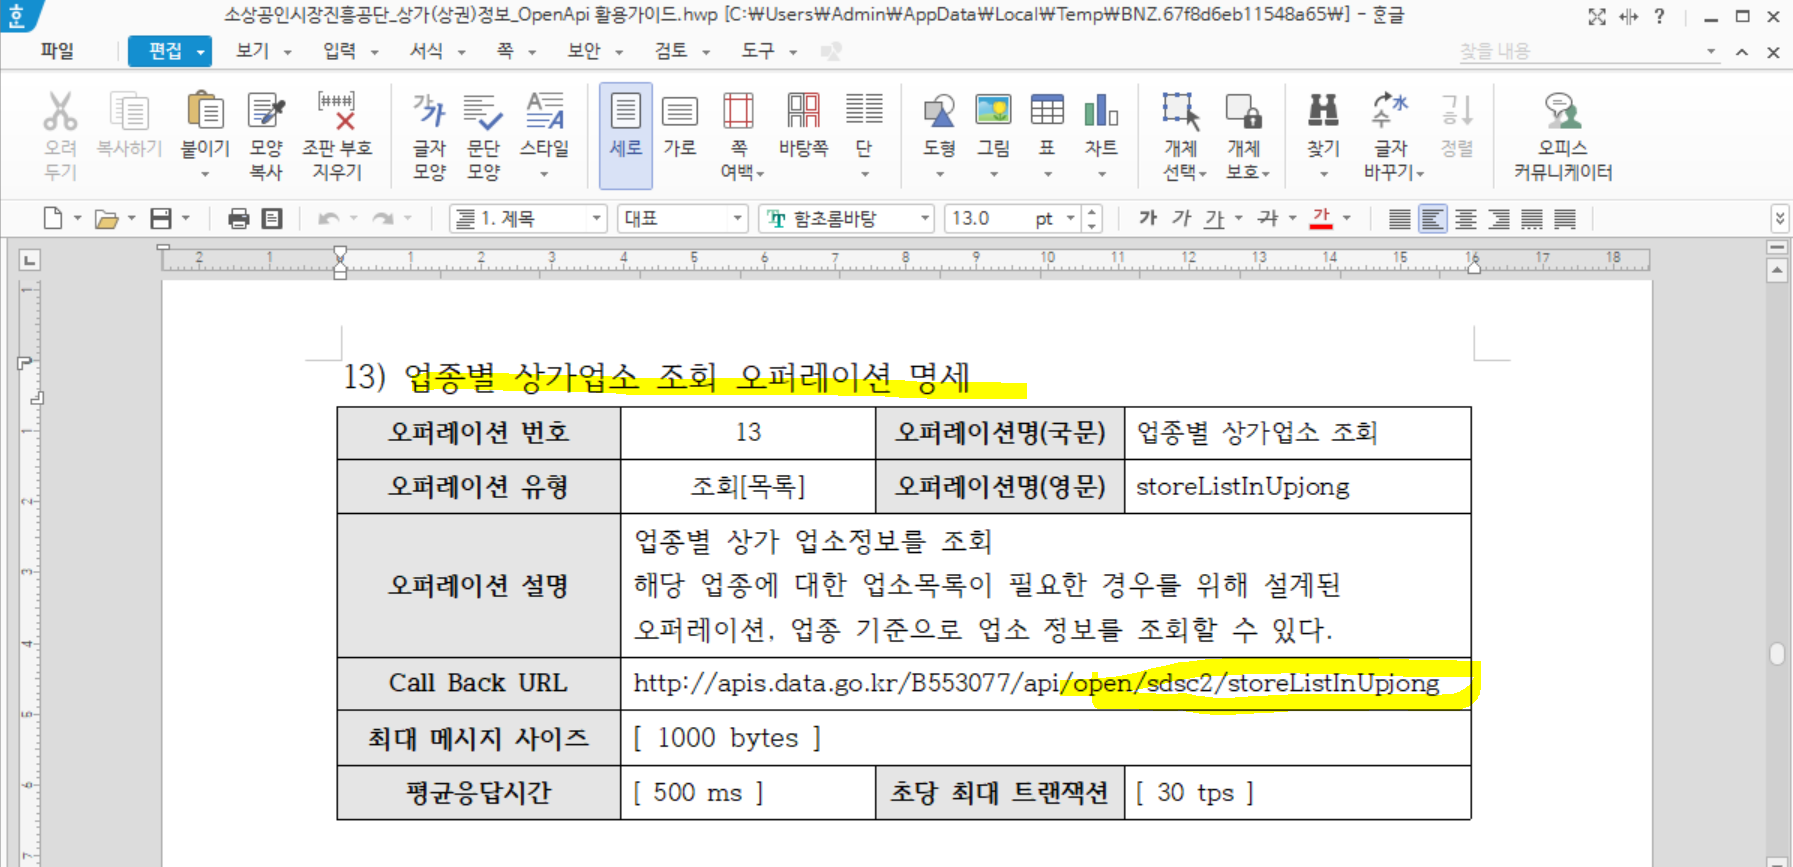
요청메시지 명세 부분 확인해서 직접 치킨 전체페이지 수집해보기<br>
한페이지 수집해서 결과를 보고 수집이 잘되면 페이지 번호보고 총 몇페이지 돌려야할지 확인해서 while문으로 전체 페이지 수집 1시간20분 주어짐.

## 기본틀 - requests

In [1]:
import requests
import time # 시간도 시작할때 같이 해주는게 좋다.

In [ ]:
url = ""
service_key= ""
payload= dict()
r= requests.get(url, parmas=payload)
print(r.url)
print(r.status_code)
response = r.json()

In [ ]:
response

# 상권정보분석
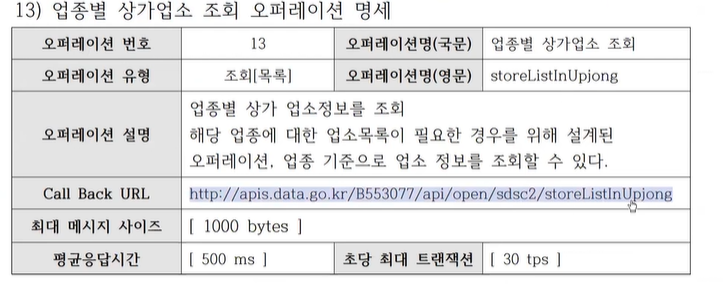
위 양식에 url 복사해서넣기.

In [3]:
url = "http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong"
service_key= "AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT+x7OrA=="
payload= dict(servicekey=service_key, 
              divId="indsSclsCd", key="I21006",
              numOfRows=10, pageNo=1, type="json" )
r= requests.get(url, params=payload)
print(r.url)
print(r.status_code)
response = r.json()

http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong?servicekey=AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT%2Bx7OrA%3D%3D&divId=indsSclsCd&key=I21006&numOfRows=10&pageNo=1&type=json
200


In [5]:
# 구조확인(포매터)에 넣을 자료 뽑아보고
response

In [6]:
# 필요한 자료 있는 좌표를 넣어주기
response['body']['items']

[{'bizesId': 'MA010120220800006500',
  'bizesNm': '김종용누룽지통닭',
  'brchNm': '',
  'indsLclsCd': 'I2',
  'indsLclsNm': '음식',
  'indsMclsCd': 'I210',
  'indsMclsNm': '기타 간이',
  'indsSclsCd': 'I21006',
  'indsSclsNm': '치킨',
  'ksicCd': 'I56193',
  'ksicNm': '치킨 전문점',
  'ctprvnCd': '11',
  'ctprvnNm': '서울특별시',
  'signguCd': '11200',
  'signguNm': '성동구',
  'adongCd': '11200550',
  'adongNm': '사근동',
  'ldongCd': '1120010700',
  'ldongNm': '행당동',
  'lnoCd': '1120010700100190046',
  'plotSctCd': '1',
  'plotSctNm': '대지',
  'lnoMnno': 19,
  'lnoSlno': 46,
  'lnoAdr': '서울특별시 성동구 행당동 19-46',
  'rdnmCd': '112004109207',
  'rdnm': '서울특별시 성동구 마조로5길',
  'bldMnno': 7,
  'bldSlno': '',
  'bldMngNo': '1120010700100190046019611',
  'bldNm': '행당동1',
  'rdnmAdr': '서울특별시 성동구 마조로5길 7',
  'oldZipcd': '133817',
  'newZipcd': '04760',
  'dongNo': '',
  'flrNo': '2',
  'hoNo': '',
  'lon': 127.040371352809,
  'lat': 37.5599266078546},
 {'bizesId': 'MA010120220800007898',
  'bizesNm': '코리안숯불닭바베큐',
  'brchNm': '',
 

In [8]:
# 반복문으로 result에 정리해넣기

result={}
for item in response['body']['items']:
    for key, value in item.items():
        result.setdefault(key,[]).append(value)
        
result

{'bizesId': ['MA010120220800006500',
  'MA010120220800007898',
  'MA010120220800009322',
  'MA010120220800001311',
  'MA010120220800009839',
  'MA010120220800010432',
  'MA010120220800012252',
  'MA010120220800012332',
  'MA010120220800003146',
  'MA010120220800012733'],
 'bizesNm': ['김종용누룽지통닭',
  '코리안숯불닭바베큐',
  '페리카나치킨',
  '페리카나',
  '매일치킨',
  '팜카페앤드전통차',
  '둘둘치킨',
  '본투비',
  '깐부치킨',
  '둘둘치킨'],
 'brchNm': ['', '', '', '', '', '', '', '', '', ''],
 'indsLclsCd': ['I2', 'I2', 'I2', 'I2', 'I2', 'I2', 'I2', 'I2', 'I2', 'I2'],
 'indsLclsNm': ['음식', '음식', '음식', '음식', '음식', '음식', '음식', '음식', '음식', '음식'],
 'indsMclsCd': ['I210',
  'I210',
  'I210',
  'I210',
  'I210',
  'I210',
  'I210',
  'I210',
  'I210',
  'I210'],
 'indsMclsNm': ['기타 간이',
  '기타 간이',
  '기타 간이',
  '기타 간이',
  '기타 간이',
  '기타 간이',
  '기타 간이',
  '기타 간이',
  '기타 간이',
  '기타 간이'],
 'indsSclsCd': ['I21006',
  'I21006',
  'I21006',
  'I21006',
  'I21006',
  'I21006',
  'I21006',
  'I21006',
  'I21006',
  'I21006'],
 'indsSclsNm': ['치킨'

In [10]:
#dataFrame만들준비
import pandas as pd
pd.DataFrame(result)

,bizesId,bizesNm,brchNm,indsLclsCd,indsLclsNm,indsMclsCd,indsMclsNm,indsSclsCd,indsSclsNm,ksicCd,...,bldMngNo,bldNm,rdnmAdr,oldZipcd,newZipcd,dongNo,flrNo,hoNo,lon,lat
0,MA010120220800006500,김종용누룽지통닭,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1120010700100190046019611,행당동1,서울특별시 성동구 마조로5길 7,133817,04760,,2,,127.040371,37.559927
1,MA010120220800007898,코리안숯불닭바베큐,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,4111513900102210027019153,,경기도 수원시 팔달구 세지로 369,442837,16242,,,,127.026567,37.283525
2,MA010120220800009322,페리카나치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1130510100103220025020436,,서울특별시 강북구 도봉로29길 10,142815,01176,,1,,127.027661,37.620729
3,MA010120220800001311,페리카나,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111013700100490000014132,,서울특별시 종로구 삼일대로 434-1,110320,03133,,,,126.988182,37.573538
4,MA010120220800009839,매일치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111016700100510000012087,,서울특별시 종로구 율곡로19길 9,110844,03100,,,,127.005411,37.575998
5,MA010120220800010432,팜카페앤드전통차,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111015300101370000017924,피카디리플러스,서울특별시 종로구 돈화문로5가길 1,110808,03139,,6,,126.991227,37.571024
6,MA010120220800012252,둘둘치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111017500102010004001211,,서울특별시 종로구 종로66길 18,110825,03115,,1,,127.021791,37.574140
7,MA010120220800012332,본투비,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111016200103200002012561,,서울특별시 종로구 대학로 5,110480,03129,,,,127.001721,37.571592
8,MA010120220800003146,깐부치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56194,...,4121010400113390001000001,아이플렉스상가,경기도 광명시 소하로 81,423051,14316,,1,,126.884017,37.447638
9,MA010120220800012733,둘둘치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1135010200100580002019598,가운데,서울특별시 노원구 석계로1길 10,139841,01902,,1,,127.064119,37.615633


In [9]:
#df에 dataFrame 넣기
df = pd.DataFrame(result)
df

#열어보면 컬럼이 영어로나옴

,bizesId,bizesNm,brchNm,indsLclsCd,indsLclsNm,indsMclsCd,indsMclsNm,indsSclsCd,indsSclsNm,ksicCd,...,bldMngNo,bldNm,rdnmAdr,oldZipcd,newZipcd,dongNo,flrNo,hoNo,lon,lat
0,MA010120220800006500,김종용누룽지통닭,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1120010700100190046019611,행당동1,서울특별시 성동구 마조로5길 7,133817,04760,,2,,127.040371,37.559927
1,MA010120220800007898,코리안숯불닭바베큐,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,4111513900102210027019153,,경기도 수원시 팔달구 세지로 369,442837,16242,,,,127.026567,37.283525
2,MA010120220800009322,페리카나치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1130510100103220025020436,,서울특별시 강북구 도봉로29길 10,142815,01176,,1,,127.027661,37.620729
3,MA010120220800001311,페리카나,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111013700100490000014132,,서울특별시 종로구 삼일대로 434-1,110320,03133,,,,126.988182,37.573538
4,MA010120220800009839,매일치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111016700100510000012087,,서울특별시 종로구 율곡로19길 9,110844,03100,,,,127.005411,37.575998
5,MA010120220800010432,팜카페앤드전통차,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111015300101370000017924,피카디리플러스,서울특별시 종로구 돈화문로5가길 1,110808,03139,,6,,126.991227,37.571024
6,MA010120220800012252,둘둘치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111017500102010004001211,,서울특별시 종로구 종로66길 18,110825,03115,,1,,127.021791,37.574140
7,MA010120220800012332,본투비,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111016200103200002012561,,서울특별시 종로구 대학로 5,110480,03129,,,,127.001721,37.571592
8,MA010120220800003146,깐부치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56194,...,4121010400113390001000001,아이플렉스상가,경기도 광명시 소하로 81,423051,14316,,1,,126.884017,37.447638
9,MA010120220800012733,둘둘치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1135010200100580002019598,가운데,서울특별시 노원구 석계로1길 10,139841,01902,,1,,127.064119,37.615633


In [11]:
# 영문컬럼자리에 넣을 컬럼 좌표.
response['header']['columns']

['상가업소번호',
 '상호명',
 '지점명',
 '상권업종대분류코드',
 '상권업종대분류명',
 '상권업종중분류코드',
 '상권업종중분류명',
 '상권업종소분류코드',
 '상권업종소분류명',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드',
 '시도명',
 '시군구코드',
 '시군구명',
 '행정동코드',
 '행정동명',
 '법정동코드',
 '법정동명',
 'PNU코드',
 '대지구분코드',
 '대지구분명',
 '지번본번지',
 '지번부번지',
 '지번주소',
 '도로명코드',
 '도로명',
 '건물본번지',
 '건물부번지',
 '건물관리번호',
 '건물명',
 '도로명주소',
 '구우편번호',
 '신우편번호',
 '동정보',
 '층정보',
 '호정보',
 '경도',
 '위도']

In [14]:
# 영문컬럼을 한글로 바꾸기
# 키 값이 같다면 서로 대응해서 바꿀수있음


result={}
for item in response['body']['items']:
    for key, value in zip(response['header']['columns'], item.values()):
        result.setdefault(key,[]).append(value)
df = pd.DataFrame(result)
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800006500,김종용누룽지통닭,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1120010700100190046019611,행당동1,서울특별시 성동구 마조로5길 7,133817,04760,,2,,127.040371,37.559927
1,MA010120220800007898,코리안숯불닭바베큐,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,4111513900102210027019153,,경기도 수원시 팔달구 세지로 369,442837,16242,,,,127.026567,37.283525
2,MA010120220800009322,페리카나치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1130510100103220025020436,,서울특별시 강북구 도봉로29길 10,142815,01176,,1,,127.027661,37.620729
3,MA010120220800001311,페리카나,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111013700100490000014132,,서울특별시 종로구 삼일대로 434-1,110320,03133,,,,126.988182,37.573538
4,MA010120220800009839,매일치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111016700100510000012087,,서울특별시 종로구 율곡로19길 9,110844,03100,,,,127.005411,37.575998
5,MA010120220800010432,팜카페앤드전통차,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111015300101370000017924,피카디리플러스,서울특별시 종로구 돈화문로5가길 1,110808,03139,,6,,126.991227,37.571024
6,MA010120220800012252,둘둘치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111017500102010004001211,,서울특별시 종로구 종로66길 18,110825,03115,,1,,127.021791,37.574140
7,MA010120220800012332,본투비,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1111016200103200002012561,,서울특별시 종로구 대학로 5,110480,03129,,,,127.001721,37.571592
8,MA010120220800003146,깐부치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56194,...,4121010400113390001000001,아이플렉스상가,경기도 광명시 소하로 81,423051,14316,,1,,126.884017,37.447638
9,MA010120220800012733,둘둘치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1135010200100580002019598,가운데,서울특별시 노원구 석계로1길 10,139841,01902,,1,,127.064119,37.615633


데이터프레임 함수화

In [16]:
#이게 기본적인 틀이되니까 항상 커널 상단(import 다음)에서 정의돼야함.
def unpack_data(response):
    result={}
    for item in response['body']['items']:
        for key, value in zip(response['header']['columns'], item.values()):
            result.setdefault(key,[]).append(value)
    df = pd.DataFrame(result)
    return df

# 함수화는 잘되었다 하더라도 쪽수를 알지 못하므로 
# 의미없는 반복이 일어날 수 있음.

## 이제 쪽수계산
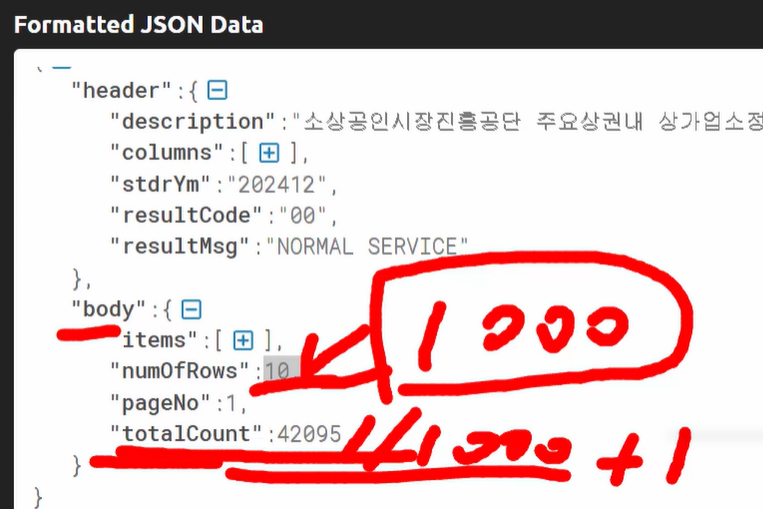
좌표 찾기

In [15]:
total_page = (response['body']['totalCount']//1000 ) +1
total_page

43

In [20]:
# 수집할때 쪽수 계산하도록 반영하기

url = "http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong"
service_key= "AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT+x7OrA=="
payload= dict(servicekey=service_key, 
              divId="indsSclsCd", key="I21006",
              numOfRows=1000, pageNo=1, type="json" )
r= requests.get(url, params=payload)
print(r.url)
print(r.status_code)
response = r.json()
total_page = (response['body']['totalCount']//1000 ) +1
df = unpack_data(response)
print("total_page: ", total_page)
df

# while문을 이용해 페이지넘버를 증가시키기.

http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong?servicekey=AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT%2Bx7OrA%3D%3D&divId=indsSclsCd&key=I21006&numOfRows=1000&pageNo=1&type=json
200
total_page:  43


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800445252,가마로닭강정,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1159010500102240001017670,제,서울특별시 동작구 서달로 151,156861,06973,,1,,126.961535,37.506975
1,MA010120220800445378,수원왕갈비통닭,보라매점,I2,음식,I210,기타 간이,I21006,치킨,I56213,...,1159010800104150005004103,,서울특별시 동작구 여의대방로24가길 12,156811,07055,,1,,126.921008,37.498774
2,MA010120220800430361,페리카나,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1159010700102130007006364,,서울특별시 동작구 사당로 168,156879,07030,,,,126.967572,37.486813
3,MA010120220800445715,치킨89,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1159010900103460008001825,노블레스빌,서울특별시 동작구 보라매로 98-5,156847,07053,,,,126.928484,37.497932
4,MA010120220800439275,또바기치킨,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1156013200103470294013808,,서울특별시 영등포구 가마산로 439,150848,07382,,,,126.905292,37.505322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,MA010120220800526797,페리카나,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,4155025026100630014014599,,경기도 안성시 공도읍 고무다리길 10-1,456825,17562,,,,127.169648,36.998410
996,MA010120220800533653,비비큐,석수점,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,4117110200103040023012812,,경기도 안양시 만안구 석천로 164-1,430806,13969,,1,,126.907387,37.411582
997,MA010120220800547453,푸드모아,,I2,음식,I210,기타 간이,I21006,치킨,M71531,...,1150010500100000000000005,보타닉파크타워,서울특별시 강서구 마곡중앙6로 11,157805,07801,,,,126.828654,37.560872
998,MA010120220800526994,치킨인류,,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,4150025330106790003000001,,경기도 이천시 부발읍 경충대로2050번길 15-46,467866,17332,,1,,127.493131,37.250713


In [ ]:
# while문을 이용해 페이지넘버를 증가시키기.

page=1 # 1쪽부터 시작되도록하고 이 변수를 payload에도 넣어주기.
while True: # 한바퀴 돌때 page가 증가하되 아무때나 증가하지 않게 조건주기
    url = "http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong"
    service_key= "AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT+x7OrA=="
    payload= dict(servicekey=service_key, 
                  divId="indsSclsCd", key="I21006",
                  numOfRows=1000, pageNo=page, type="json" )
    r= requests.get(url, params=payload)
    print(r.url)
    print(r.status_code)
    response = r.json()
    total_page = (response['body']['totalCount']//1000 ) +1
    df = unpack_data(response)
    print(f"{page}/{total_page} 수집중", end="\r")

#조건문 위치
    if page < total_page:
        page +=1
    else: break

    
    df


In [22]:
# df 결과가 append 될 변수
result_dfs= []
page=1 
while True: 
    url = "http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong"
    service_key= "AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT+x7OrA=="
    payload= dict(servicekey=service_key, 
                  divId="indsSclsCd", key="I21006",
                  numOfRows=1000, pageNo=page, type="json" )
    r= requests.get(url, params=payload)
    print(r.url)
    print(r.status_code)
    response = r.json()
    total_page = (response['body']['totalCount']//1000 ) +1
    
#함수가 돌면 결과가 append되도록
    result_dfs.append(unpack_data(response))
    print(f"{page}/{total_page} 수집중", end="\r")

    if page < total_page:
        page +=1
    else: break 
# 중간에 에러없이 멈춘다면 
# time.sleep(0.2) 주도록하기.

# 데이터프레임의 인덱스를 리셋해주기
result=pd.concat(result_dfs)
result=result.reset_index(drop=True)

#csv로 저장
#result.to_csv("공공데이터_상권정보_202504.csv", encoding="utf-8", index=False)

http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong?servicekey=AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT%2Bx7OrA%3D%3D&divId=indsSclsCd&key=I21006&numOfRows=1000&pageNo=1&type=json
200
http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong?servicekey=AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT%2Bx7OrA%3D%3D&divId=indsSclsCd&key=I21006&numOfRows=1000&pageNo=2&type=json
200
http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong?servicekey=AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT%2Bx7OrA%3D%3D&divId=indsSclsCd&key=I21006&numOfRows=1000&pageNo=3&type=json
200
http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong?servicekey=AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT%2Bx7OrA%3D%3D&divId=indsSclsCd&key=I21006&numOfRows=1000&pageNo=4&type=json
200
http://apis.data.go.kr/B553077/api/open/sdsc2/storeListI

http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong?servicekey=AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT%2Bx7OrA%3D%3D&divId=indsSclsCd&key=I21006&numOfRows=1000&pageNo=36&type=json
200
http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong?servicekey=AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT%2Bx7OrA%3D%3D&divId=indsSclsCd&key=I21006&numOfRows=1000&pageNo=37&type=json
200
http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong?servicekey=AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT%2Bx7OrA%3D%3D&divId=indsSclsCd&key=I21006&numOfRows=1000&pageNo=38&type=json
200
http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong?servicekey=AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT%2Bx7OrA%3D%3D&divId=indsSclsCd&key=I21006&numOfRows=1000&pageNo=39&type=json
200
http://apis.data.go.kr/B553077/api/open/sdsc2/storeL

In [ ]:
result.to_csv("공공데이터_상권정보_202504.csv", encoding="utf-8", index=False)

## 엑셀파일에서 특정 컬럼을 따와서 반복문에 넣을 수 있으므로 판다스가 훨씬 편하다.

In [23]:
# 준비) 소분류코드가 정리되어있는 엑셀파일 파이썬에서 불러오기
!pip install openpyxl # 한번 깔고나면 같은 컴에서는 안해도된다고하심.

In [28]:
# 소분류코드가 정리되어있는 엑셀파일 파이썬에서 불러오기
ori_data=pd.read_excel(
    "./data/소상공인시장진흥공단_상가(상권)정보_업종분류(2302)_및_연계표_v1.0.xlsx",
    engine="openpyxl", header=[1]) # [1]번째 줄을 header로 가져와라
ori_data

#결과에서 소분류코드만 필요한거니까.

,대분류코드,대분류명,중분류코드,중분류명,소분류코드,소분류명
0,G2,소매업,G202,자동차 부품 및 내장품 소매업,G20201,타이어 소매업
1,G2,소매업,G202,자동차 부품 및 내장품 소매업,G20202,자동차 부품 소매업
2,G2,소매업,G203,모터사이클 및 부품 소매업,G20301,모터사이클 및 부품 소매업
3,G2,소매업,G204,종합 소매업,G20404,슈퍼마켓
4,G2,소매업,G204,종합 소매업,G20405,편의점
...,...,...,...,...,...,...
242,S2,수리 및 개인 서비스업,S209,세탁업,S20902,셀프 빨래방
243,S2,수리 및 개인 서비스업,S210,장례식장 및 관련 서비스업,S21001,장례식장
244,S2,수리 및 개인 서비스업,S210,장례식장 및 관련 서비스업,S21002,화장터/묘지/납골당
245,S2,수리 및 개인 서비스업,S211,기타 개인서비스,S21101,예식장업


In [29]:
ori_data['소분류코드'] # 이렇게 소분류코드만 모아서 이걸 수집코드에 반영하기.

0      G20201
1      G20202
2      G20301
3      G20404
4      G20405
        ...  
242    S20902
243    S21001
244    S21002
245    S21101
246    S21105
Name: 소분류코드, Length: 247, dtype: object

In [30]:
# 소분류 코드별로 데이터 수집되도록.
for code, name in zip(ori_data['소분류코드'],ori_data['소분류명'])

    result_dfs= []
    page=1 
    while True: 
        url = "http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong"
        service_key= "AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT+x7OrA=="
        payload= dict(servicekey=service_key, 
                      divId="indsSclsCd", key="I21006",
                      numOfRows=1000, pageNo=page, type="json" )
        r= requests.get(url, params=payload)
        print(r.url)
        print(r.status_code)
        response = r.json()
        total_page = (response['body']['totalCount']//1000 ) +1

    #함수가 돌면 결과가 append되도록
        result_dfs.append(unpack_data(response))
        print(f"{page}/{total_page} 수집중", end="\r")

        if page < total_page:
            page +=1
        else: break 
    # 중간에 에러없이 멈춘다면 
    # time.sleep(0.2) 주도록하기.

    # 데이터프레임의 인덱스를 리셋해주기
    result=pd.concat(result_dfs)
    result=result.reset_index(drop=True)

    #csv로 저장
    #result.to_csv("공공데이터_상권정보_202504.csv", encoding="utf-8", index=False)

SyntaxError: invalid syntax (686997871.py, line 2)

In [31]:
# 수집중에 발생한 오류 잡기.
import os

for idx(code, name) in enumerate(zip(ori_data['소분류코드'],ori_data['소분류명'])):
    name=name.replace("/","_").replace("·","_")
    print(f"{name}_수집중 {idx}/{len(ori_data['소분류코드'])}", end="\r")
    result_dfs= []
    page=1 
    while True: 
        url = "http://apis.data.go.kr/B553077/api/open/sdsc2/storeListInUpjong"
        service_key= "AvnDre8j97JuQUiFIJilb4zUNaqXA4yiNsODUKKwuUi8JNuiUpWZMVfVk72xJdyzbWSTUjSUhGS8WgNT+x7OrA=="
        payload= dict(servicekey=service_key, 
                      divId="indsSclsCd", key="I21006",
                      numOfRows=1000, pageNo=page, type="json" )
        r= requests.get(url, params=payload)
        print(r.url)
        print(r.status_code)
        response = r.json()
        total_page = (response['body']['totalCount']//1000 ) +1

    #함수가 돌면 결과가 append되도록
        result_dfs.append(unpack_data(response))
        print(f"{page}/{total_page} 수집중", end="\r")

        if page < total_page:
            page +=1
        else: break 
        time.sleep(0.2) 주도록하기.


    result=pd.concat(result_dfs)
    result=result.reset_index(drop=True)
    
# 폴더가 없다면 생성한 후 저장하기
    if not os.path.exists("./scraping_results"):
        os.mkdir("./scraping_results")
        
    else: print("scraping_results가 이미 있습니다")
    result.to_csv(f"./scraping_results/공공데이터_{name}_상권정보_202504.csv", encoding="utf-8", index=False)

SyntaxError: cannot assign to function call (632531904.py, line 4)